In [1]:
import numpy as np
import pandas as pd

import csv
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('gapping/train.csv', sep = '\t', quoting = csv.QUOTE_NONE)
dev = pd.read_csv('gapping/dev.csv', sep = '\t', quoting = csv.QUOTE_NONE)

<b>Количество примеров в train'е и dev'е</b>

In [3]:
train.shape

(16406, 8)

In [4]:
dev.shape

(4142, 8)

<b>Проверка, что распределения train'а и dev'а совпадают</b>

In [5]:
train['class'].value_counts()

0    10864
1     5542
Name: class, dtype: int64

In [6]:
dev['class'].value_counts()

0    2760
1    1382
Name: class, dtype: int64

In [7]:
train['class'].value_counts()[0] / train['class'].value_counts().sum()

0.6621967572839205

In [8]:
dev['class'].value_counts()[0] / dev['class'].value_counts().sum()

0.6663447609850314

<b>Сравниваем длины текстов в train'е и dev'е: видно, что разбиение честное</b>

In [9]:
train['lenc'] = train['text'].apply(len)
dev['lenc'] = dev['text'].apply(len)
train['lenw'] = train['text'].apply(lambda x: len(x.split(' ')))
dev['lenw'] = dev['text'].apply(lambda x: len(x.split(' ')))

In [10]:
train['lenc'].describe()

count    16406.000000
mean       151.018530
std        102.030574
min         12.000000
25%         84.000000
50%        128.000000
75%        189.000000
max       1138.000000
Name: lenc, dtype: float64

In [11]:
dev['lenc'].describe()

count    4142.000000
mean      152.649445
std       103.434866
min        10.000000
25%        85.000000
50%       130.000000
75%       190.000000
max      1008.000000
Name: lenc, dtype: float64

In [12]:
train['lenw'].describe()

count    16406.000000
mean        21.150067
std         12.905288
min          1.000000
25%         13.000000
50%         18.000000
75%         26.000000
max        146.000000
Name: lenw, dtype: float64

In [13]:
dev['lenw'].describe()

count    4142.000000
mean       21.241912
std        12.964626
min         2.000000
25%        13.000000
50%        18.000000
75%        26.000000
max       149.000000
Name: lenw, dtype: float64

In [14]:
train[train['lenw'] < 3]['class'].value_counts()

0    3
Name: class, dtype: int64

In [15]:
train_len_pos = []

for i in range(3, 50):
    vs = train[train['lenw'] == i]['class'].value_counts()
    train_len_pos.append(1 - (vs[0] / vs.sum()))

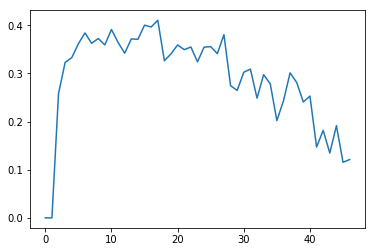

In [16]:
plt.plot(train_len_pos)

In [17]:
dev_len_pos = []

for i in range(3, 50):
    vs = dev[dev['lenw'] == i]['class'].value_counts()
    dev_len_pos.append(1 - (vs[0] / vs.sum()))

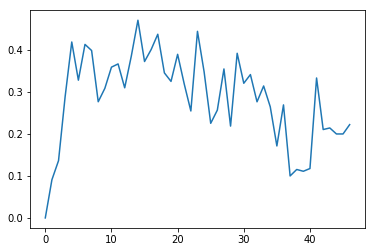

In [18]:
plt.plot(dev_len_pos)

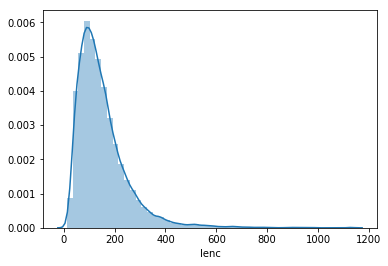

In [19]:
sns.distplot(train['lenc']);

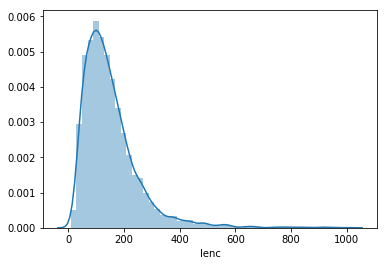

In [20]:
sns.distplot(dev['lenc']);

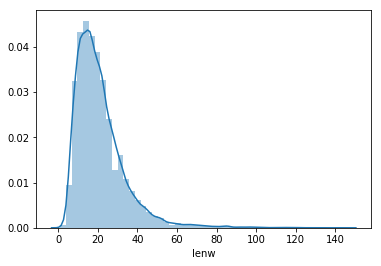

In [21]:
sns.distplot(train['lenw']);

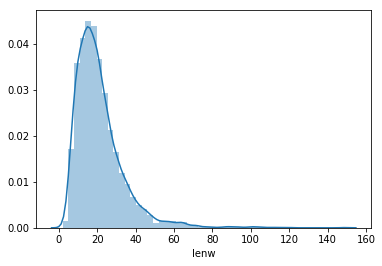

In [22]:
sns.distplot(dev['lenw']);

In [23]:
train.iloc[1]

text     Работа с двухбайтовыми наборами символов — про...
class                                                    1
cV                                                   92:99
cR1                                                  83:91
cR2                                                103:109
V                                                  127:127
R1                                                 119:124
R2                                                 127:134
lenc                                                   135
lenw                                                    23
Name: 1, dtype: object

In [24]:
# идеи: посмотреть, как "дела" с тире: какая точность при наличии тире
# посмотреть, есть ли baselines; если нет, написать организаторам по поводу baselin'ов
# можно ли решать только часть задач: можно ли обнаруживать только глагол; не привязывать аргументы
pd.set_option('max_colwidth', 1000)

In [25]:
train[train['class'] == 1].sample(50)

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw
12338,"По состоянию на 31 декабря 2010 года продажи алмазов сторонам, контролируемым государством, включали продажи Государственному фонду драгоценных металлов и драгоценных камней Российской Федерации в размере 25 млн. руб. (по состоянию на 31 декабря 2009 года - 27 060 млн. руб.).",1,92:100,0:36,205:217,258:258,219:255,258:274,276,40
12140,"Операционные издержки будут складываться на две трети из долларовых платежей, а на треть— из расходов на покупку комплектующих в Лионе и оплату управленческих услуг и патентных прав головного офиса.",1,28:40,41:53,54:76,90:90,80:88,90:197,198,29
235,"На наш взгляд, это именно тот подход, благодаря которому мы сможем предоставить нашему государству потенциал для защиты уязвимых слоев населения, а нашим гражданам — средства для строительства лучшего будущего.",1,60:66,80:98,99:144,166:166,148:163,166:209,210,29
6336,"Первый, третий, пятый и шестой биты содержат 1, а остальные — 0.",1,36:44,0:35,45:46,62:62,50:59,62:63,64,12
7896,"В любой момент времени в работе ( в передаче момента) находится восемь цевочных осей (четыре зацепляются с корпусом, четыре с ведомым валом).",1,93:104,86:92,105:115,124:124,117:123,124:139,141,22
13833,"Из всех подписанных проектов 22% приходились на оптовые операции, а еще 6% - на прямые операции в секторе финансовых учреждений, то есть на долю финансовых учреждений пришлось 28% выделенных средств.",1,33:44,29:32,45:64,77:77,68:74,77:127,199,30
4593,"Все эти действия связаны с пунктами компонента MainMenu, а некоторые из них — также с кнопками элемента управления панели инструментов.",1,17:24,0:16,25:55,78:78,59:75,78:134,135,20
898,"Для ввода с консоли приложение передает вместо имени файла строку ""CONIN$"", а для вывода на консоль — строку ""CONOUT$"".",1,31:39,0:19,59:74,102:102,78:99,102:118,119,19
12970,"лучше всего от бедер помогают махи, от икр - растяжка, от ног - ходьба",1,21:29,12:20,30:34,45:45 64:64,36:42 55:61,45:53 64:70,70,14
6989,"И вода была мокрее, и трава зеленее.",1,7:11,2:6,12:18,28:28,22:27,28:35,36,7


In [26]:
train.sample(50)

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw
14921,"Так, накануне президент Украины выступил с инициативой увеличить численность армии на 68 тысяч штыков — до 250 тысяч.",0,NaN,NaN,NaN,NaN,NaN,NaN,117,18
11827,"Значения SAR зависят от государственных стандартов и нормативов, а также от частотных диапазонов сетей",0,NaN,NaN,NaN,NaN,NaN,NaN,102,14
12152,"Он как будто видел что-то в глубине, и взгляд его был рассеянным, а выражение лица — полным боли.",1,50:53,39:49,54:64,85:85,68:82,85:96,97,18
5942,"Зарядная инфраструктура «Револьты» сегодня включает в себя 45 станций, компания заинтересована в интенсивном расширении регионального присутствия через партнеров по всей России",0,NaN,NaN,NaN,NaN,NaN,NaN,176,20
14358,"Левый служит для выбора начального, правый — для выбора конечного значения диапазона.",1,6:12,0:5,13:34,45:45,36:42,45:84,85,12
5257,"Анодный слой наносят на наружную поверхность конструкции, а катодный - на внутреннюю pH катодного слоя меньше pH анодного не менее чем на 1.",1,13:20,0:12,21:56,71:71,60:68,71:139,140,23
10730,"Тем не менее мы полагаем, что ВМЗ как лидер отрасли будет продолжать получать заказы",0,NaN,NaN,NaN,NaN,NaN,NaN,84,14
8396,"Мне по-прежнему хотелось знать, как он сумел выжить, а ему — рассказать мне об этом, но мы позволяем друг другу упрямиться, когда дело не касается чего-то жизненно важного.",1,16:24,0:3,25:51,61:61,55:58,61:83,172,28
10032,"Я во многом виновата,да виновата..",0,NaN,NaN,NaN,NaN,NaN,NaN,34,5
2311,"Умей находить в темных-яркие цвета,в печали-улыбку,в минусе свой плюс.",1,0:4,14:22,23:34,44:44 60:60,35:43 51:59,44:50 60:69,70,9


<b>Посчитаем количество слов в train'е, чтобы проверить, оправдан ли подход "замены слова"</b>

In [27]:
def symb_cv(row):
    if row['class'] == 0:
        return '-1'
    tmp = row['cV']
    lst = row['cV'].split(':')
    start = int(lst[0])
    end = int(lst[1])
    return row['text'][start:end]

In [28]:
train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))).value_counts()

1    5542
dtype: int64

<b>Посмотрим подробнее: оказывается, что это - ошибки разметки; только 2 примера - действительно гэппинг с двумя словами (следуют в)</b>

In [29]:
train[train['class'] == 1][train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))) == 2]

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw


In [30]:
train[train['class'] == 1][train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))) == 2].apply(symb_cv, axis = 1)

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw


<b>Видна структура ошибок разметки. Часть разметок сместилась на одну позицию (вправо).

Исправить ошибки в разметке? Скорее всего, сообщить о них организаторам, ведь часть из ошибок наверняка попала и в тест.</b>

------------------------------------------------------------------------------------------------------------------------
<b>Посмотрим, по сколько раз в предложениях датасета опускается гэппинг</b>

In [31]:
train[train['class'] == 1]['V'].apply(lambda x: x.count(':')).value_counts()

1    5173
2     315
3      45
4       7
5       2
Name: V, dtype: int64

<b>Проверка гэппинга на части речи</b>

In [32]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [33]:
morph.parse('ратифицирована'.lower())

[Parse(word='ратифицирована', tag=OpencorporaTag('PRTS,impf,past,pssv femn,sing'), normal_form='ратифицировать', score=0.5, methods_stack=((<DictionaryAnalyzer>, 'ратифицирована', 75, 200),)),
 Parse(word='ратифицирована', tag=OpencorporaTag('PRTS,perf,past,pssv femn,sing'), normal_form='ратифицировать', score=0.5, methods_stack=((<DictionaryAnalyzer>, 'ратифицирована', 75, 204),))]

In [34]:
from nltk.tag import pos_tag

In [75]:
def check_verb_in_tags(word):
    tags = set([x.tag.POS for x in morph.parse(word.lower())])
    if ('VERB' in tags) or ('PRTS' in tags) or ('INFN' in tags) or ('PRED' in tags) or ('GRND' in tags):
        return 'VERB'
    else:
        return morph.parse(word.lower())[0].tag.POS

In [76]:
#train['pos'] = train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: morph.parse(x.lower())[0].tag.POS)
train['pos'] = train[train['class'] == 1].apply(symb_cv, axis = 1).apply(check_verb_in_tags)

In [77]:
train['pos'].value_counts()

VERB    5447
ADJS      93
Name: pos, dtype: int64

In [37]:
train['Cv_word'] = train.apply(symb_cv, axis = 1)

In [80]:
train[train['pos'] == 'ADJS']

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw,pos,Cv_word
680,"Часть тебя должна любить мир и восхищаться им, другая же ждать удара и быть готовым к войне.",1,11:17,0:10,18:45,57:57,47:56,57:91,92,17,ADJS,должна
693,"Перед вставкой батарейки проверьте ее тип и убедитесь в том, что правильно расположили ее полюса (положительный полюс должен быть направлен к задней стенке устройства, а отрицательный к передней панели)!",1,118:124,98:117,140:166,184:184,170:183,184:201,203,29,ADJS,должен
972,"Мужчина должен созреть,а женщина изначально осознать свое женское предназначение.",1,8:14,0:7,15:22,33:33,25:32,33:80,81,9,ADJS,должен
1173,"Номинальная толщина наружного защитного полиэтиленового шланга кабелей марок МКСАШп, МКГСАШп должна быть 1.4мм, кабеля марки МКССтШп- 1.6 мм.",1,93:99,63:92,105:110,134:134,112:132,134:140,141,18,ADJS,должна
1296,"Партия проката, изготовленного из слябов, полученных на машинах непрерывного литья заготовок, должна состоять из проката одной марки стали, одной толщины, одного режима термической или упрочняющей обработки; партия проката из слитков - кроме того, из одной плавки-ковша.",1,94:100,0:92,110:206,236:236,208:233,236:269,270,36,ADJS,должна
1770,"Утопающий, чтобы спасатель мог подтянуть его к судну, должен взяться за петлю руками, а в идеальном варианте — продеть петлю себе подмышки.",1,54:60,61:84,NaN,111:111,111:138,NaN,139,22,ADJS,должен
2092,"Работа должна приносить результат, а люди идти навстречу.",1,7:13,0:6,14:33,42:42,37:41,42:56,57,8,ADJS,должна
2237,"Используя мышцы спины, мягко толкайте вперёд бёдра, таз, и живот; при этом мышцы спины должны оставаться в расслабленном состоянии, а руки — сохранять контакт с пятками.",1,87:93,75:86,94:130,141:141,134:138,141:168,169,26,ADJS,должны
2298,"Экс-президент Франции: Украина должна стать конфедерацией, а Крым - остаться российским",1,31:37,23:30,38:57,68:68,61:65,68:87,87,11,ADJS,должна
2414,"Перекос необработанных торцов не должен превышать 2 мм, а фрезерованных - 1 мм при измерении в любом направлении.",1,33:39,8:29,50:54,74:74,58:71,74:112,113,18,ADJS,должен


In [39]:
train[train['pos'] == 'ADJS']['Cv_word']

339         разбита
507       вооружены
668          должно
680          должна
683        вооружен
693          должен
972          должен
1173         должна
1202         писана
1296         должна
1403         занята
1451     установлен
1487          одето
1649     необходимо
1770         должен
1804         заняты
2092         должна
2237         должны
2298         должна
2414         должен
2547         должно
2748         должны
3052         должен
3069        Заменим
3088         должно
3229         должна
3439         служил
3473         должна
3478     установлен
3521         должны
            ...    
13258        должны
13324        должна
13504        должны
13714        должны
13720        занята
13786        должна
13857       окружен
13936        должны
14221        избран
14275       признан
14436        избран
14514        должны
14555        указан
14560        должен
14564       склонен
14689        должны
14831        должна
15085        должен
15189        избран


In [40]:
df = train[train['pos'] != 'VERB']

In [45]:
df[df['pos'].notnull()]

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw,pos,Cv_word
8,"Первая конвенция была ратифицирована 80 процентами государств – членов МОТ, а вторая – 87 процентами этих государств.",1,22:36,0:16,37:74,87:87,78:84,87:116,117,17,PRTS,ратифицирована
43,"Плановый уровень доходов республиканского бюджета был увеличен на 14.7% по сравнению с первоначальным уровнем, а расходов - на 13.3%.",1,54:62,17:49,63:71,124:124,113:121,124:132,133,19,PRTS,увеличен
76,"Множество, не являющееся конечным, мы будем называть бесконечным, а его кардинальное число — бесконечным или трансфинитным кардинальным числом.",1,44:52,0:33,53:64,93:93,68:90,93:142,143,18,INFN,называть
82,"В первом случае мы будем говорить просто об изоморфизме, а во втором — об инверсном изоморфизме тел АГ и АГ.",1,25:33,0:15,34:55,71:71,59:68,71:107,108,20,INFN,говорить
90,"Так что через несколько дней Хряк, понятное дело, нервничал, пытаясь одновременно отдать честь, предъявить удостоверение личности и увольнительную, кося при этом одним глазом на Нупа, а другим – на вещмешок с радиолампами.",1,148:152,162:174,175:182,195:195,186:192,195:221,222,32,GRND,кося
98,"Из стен выступали полки, пока они были пустыми; к середине руля был приделан компас, а к полу – жестяная зеленая коробка передатчика с телефонной трубкой.",1,68:76,48:63,77:83,96:96,87:93,96:153,154,25,PRTS,приделан
149,"А потом еще и говорят, мол, чужое мнение надо уважать, а свое держать при себе.",1,41:45,28:40,46:53,62:62,57:61,62:78,79,15,PRED,надо
160,"Упругий элемент одним концом закреплен на шпинделе, а другим концом - на насадке.",1,29:38,16:28,39:50,70:70,54:67,70:80,81,13,PRTS,закреплен
169,"Больше выпущено товарной пищевой рыбной продукции (включая консервы) - на 3,8%, кулинарных изделий - в 4 раза, икры - в 1,2 раза.",1,7:15,16:49,71:78,101:101 118:118,80:98 111:115,101:109 118:128,129,22,PRTS,выпущено
205,"Ханна опустилась на колени у носилок, положив одну руку на холодный металл, а другую – на плечо умирающего.",1,38:45,46:55,56:74,87:87,78:84,87:106,107,18,GRND,положив


In [49]:
train.apply(lambda x: '—' in x['text'], axis = 1).value_counts()

False    14159
True      2247
dtype: int64

In [51]:
train.apply(lambda x: '-' in x['text'], axis = 1).value_counts()

False    11280
True      5126
dtype: int64

In [54]:
train[train.apply(lambda x: '-' in x['text'], axis = 1)]

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw,pos,Cv_word
3,"Продажа недвижимости из собственных портфелей перестала рассматриваться ими в качестве одного из немногих, а иногда - единственного источника капитала для погашения обязательств перед кредиторами.",0,NaN,NaN,NaN,NaN,NaN,NaN,196,24,NaN,-1
7,"Текущие обязательства компании в 2009 г. сократились на 16% - до 135.3 млн. грн., долгосрочные обязательства уменьшились на 1.7% - до 71.8 млн. грн., а дебиторская задолженность - на 3% до 87.7 млн. грн.",1,109:120,82:108,121:148,180:180,152:177,180:202,203,34,VERB,уменьшились
10,"Сущность изобретения: мазь, включающая трициклическое соединение или его фармацевтически приемлемую соль, солюбилизирующий или промотирующий впитывание агент и мазевую основу при содержании указанных компонентов в мас.% соответственно 0,01-10, 1-30 и остальное до 100%",0,NaN,NaN,NaN,NaN,NaN,NaN,268,32,NaN,-1
13,"На первой - при давлении 120 - 170 атм., а на второй - 80 атм",0,NaN,NaN,NaN,NaN,NaN,NaN,61,15,NaN,-1
17,"Z - означает группу - NRaRb, где Ra и Rb - одинаковые или различные и каждый означает водород",0,NaN,NaN,NaN,NaN,NaN,NaN,93,18,NaN,-1
20,"Однако за счет переориентации на другие рынки в целом импорт куриного мяса превысил показатели 2001 г. по стоимости - на 10,5%, по физическим объемам - на 1,4%.",1,75:83,103:115,118:126,152:152,128:149,152:159,160,27,VERB,превысил
23,"Вновь слезы, вновь на горячую юную руку сыплются поцелуи, вновь нежные объятия, - некоторое время дама не находит в себе сил заговорить.",0,NaN,NaN,NaN,NaN,NaN,NaN,136,22,NaN,-1
29,"Не замается в оконце, мир как-будто бы не тот,",0,NaN,NaN,NaN,NaN,NaN,NaN,46,9,NaN,-1
30,"В 2005 г. в газопроводы ЕСГ поступило 699,7 млрд м3 газа (в 2001 г. - 621,2 млрд м3), таким образом, объемы транспортировки газа выросли на 12,6 %.",1,28:37,0:9,38:56,70:70,58:67,70:83,147,27,VERB,поступило
36,"Неправильное или слишком быстрое разогревание воска может привести к ожогам, а при хрупкости капилляров- к появлению сосудистых звездочек на коже.",1,52:57,67:75,NaN,105:105,105:145,NaN,146,20,VERB,может


In [81]:
set([x.tag.POS for x in morph.parse('готов')])

{'ADJS', 'NOUN'}